# HW2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pylab as im_plt

## Question 2 

### (a) Transition Matrix

In [4]:
A = np.array([[1/4, 1/4, 1/4, 1/4, 1/4, 1/4],
              [  0, 1/4,   0,   0, 1/4,   0],
              [  0,   0,   0, 1/2,   0,   0],
              [1/4, 1/4, 1/2,   0, 1/4, 1/4],
              [1/4, 1/4, 1/4, 1/4, 1/4, 1/4],
              [1/4,   0,   0,   0,   0, 1/4]]);

### (b) Stationary Distribution 

In [5]:
es, vs = np.linalg.eig(A)
i = np.argmax(np.isclose(es, 1.0))
v = vs[:, i]
v = v / sum(v)
print(v)

[ 0.25        0.08333333  0.11111111  0.22222222  0.25        0.08333333]


The stationary distribution is $\pi = [0.25 , 0.083 , 0.111 , 0.222 , 0.25 , 0.083]$. 

### (c) Detailed Balance 

In [7]:
x = np.dot(A, np.diag(v))
print(x)

[[ 0.0625      0.02083333  0.02777778  0.05555556  0.0625      0.02083333]
 [ 0.          0.02083333  0.          0.          0.0625      0.        ]
 [ 0.          0.          0.          0.11111111  0.          0.        ]
 [ 0.0625      0.02083333  0.05555556  0.          0.0625      0.02083333]
 [ 0.0625      0.02083333  0.02777778  0.05555556  0.0625      0.02083333]
 [ 0.0625      0.          0.          0.          0.          0.02083333]]


In [8]:
# x.T is the same as x.transpose()
np.isclose(x, x.T).all()

False

The process does not satisfy the detailed balance equation. 

### (d) Finding $T_{mix}$ 

In [9]:
def calcVar(b,v):       
    cur_total_var = sum(np.abs(b-v))       
    cur_total_var /= 2  
    return cur_total_var;   

epsilon = 1e-8
MAX = 100
T_mix = 0

b = np.dot(A,[1, 0, 0, 0, 0, 0])
cur_total_var = calcVar(b,v)      
if(cur_total_var < epsilon):
    T_mix = 1   

if(T_mix == 0):
    for t in range(2,MAX):
    
        b = np.dot(A,b)
        #take the total variation distance 
        #until it is below the threshold
        cur_total_var = calcVar(b,v)    
        if(cur_total_var < epsilon):
            T_mix = t
            break

print(T_mix)

24


$T_{mix}= 24$

### (e) Visualize intermediary powers of A 

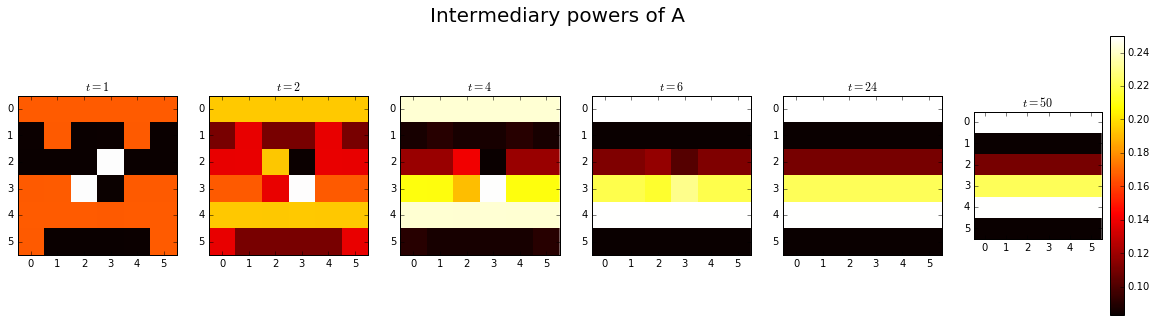

In [49]:
fig, ax = plt.subplots(nrows=1, ncols=6, figsize=(20,5))
fig.suptitle('Intermediary powers of A', fontsize=20)

for i, n in enumerate([1, 2, 4, 6, 24, 50]):
    cur_im = ax[i].imshow(np.linalg.matrix_power(A, n), cmap='hot', interpolation='none')    
    ax[i].set_title("$t = %d$" % n)
plt.colorbar(cur_im)
plt.show()

### (f) Multiple chain runs

In [12]:
def simulate(P, N):
    chain = np.zeros(N).astype(int)
    chain[0] = 0
    for i in range(1,N):
        pr = P[:, chain[i-1]]
        chain[i] = np.random.choice(range(6), p = pr)

    return(chain)

In [52]:
nchains = 1000
chain_length = T_mix
samples = np.zeros([nchains, chain_length]).astype(int)
for i in range(0, nchains):
    ch = simulate(A, chain_length)
    samples[i,:] = ch
    
#print(samples)    

In [41]:
# Generate histograms
smpls = np.zeros((6,T_mix),dtype=np.float)
for t in range(0,T_mix):
    smpls[:,t], bins = np.histogram(samples[:,t], bins=[0, 1, 2, 3, 4, 5, 6])
    smpls[:,t] = smpls[:,t]/nchains
#print(smpls)

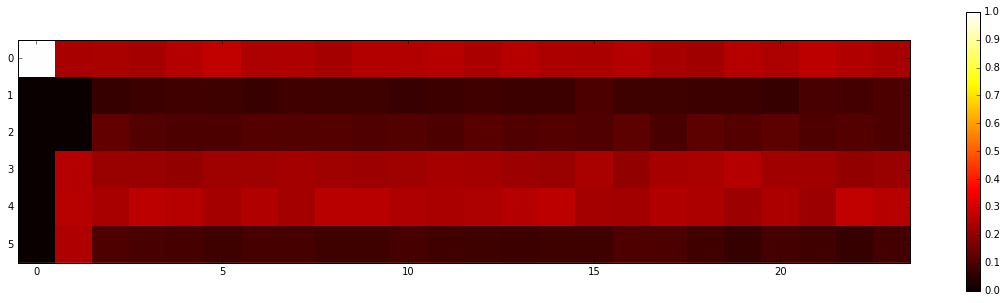

In [50]:
fig, ax = plt.subplots(figsize=(20,5))
im = ax.imshow(smpls, cmap='hot', interpolation='none')
fig.colorbar(im)
plt.show()

Following plot explicitly shows the histogram of the last states of each chain. As we reach the mixing time $T_{mix}$, these samples are i.i.d from the stationary distribution of the chain.

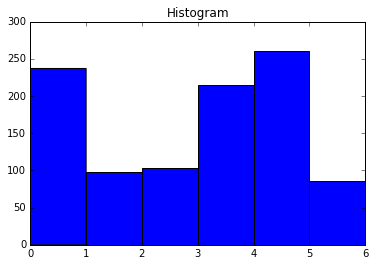

In [51]:
sampls, bins = np.histogram(samples[:, chain_length-1], bins=[0, 1, 2, 3, 4, 5, 6])
plt.hist(samples[:, chain_length-1], bins=[0, 1, 2, 3, 4, 5, 6])
plt.title('Histogram')
plt.show()

### (g) Single chain run 

In [22]:
chain = simulate(A, int(1e3)+T_mix)
print(chain)

[0 4 3 ..., 0 4 4]


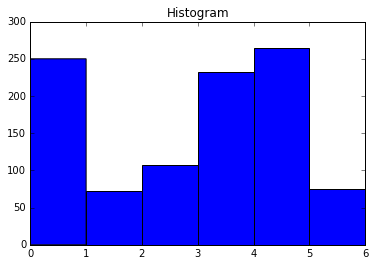

In [23]:
samples, bins = np.histogram(chain[T_mix:], bins=[0, 1, 2, 3, 4, 5, 6])
#print(chain[T_mix:])
#print(samples)
plt.hist(chain[T_mix:], bins=[0, 1, 2, 3, 4, 5, 6])
plt.title('Histogram')
plt.show()

The histogram results:

In [15]:
print(samples/sum(samples))

[ 0.236  0.086  0.112  0.2    0.279  0.087]


Stationary distribution $\pi$:

In [16]:
print(v)

[ 0.25        0.08333333  0.11111111  0.22222222  0.25        0.08333333]


Although the samples are dependent, their histogram agrees with the stationary distribution obtained numerically from the first eigenvector.